In the previous chapter, we discussed techniques related to data collecting and processing before building a spline suitable for continuous dataflow representation. We used a so-called PCHIP interpolator, but there are also other ones in the library.

<a>https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html</a>

NOTE: It is recommended to delete the output of the next cell.

In [ ]:
from datetime import datetime, timedelta, timezone
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import the functions we defined in the previous chapter
%run ./Chapter1.ipynb
# import ipynb
# from ipynb.fs.full.t1 import create_ts_grid, limit_values_by_roc, squash_bins

First, let's prepare our data. We will use a fake dataset with data irregularly distributed along the time axis. Let's apply the functions prepared previously to it.

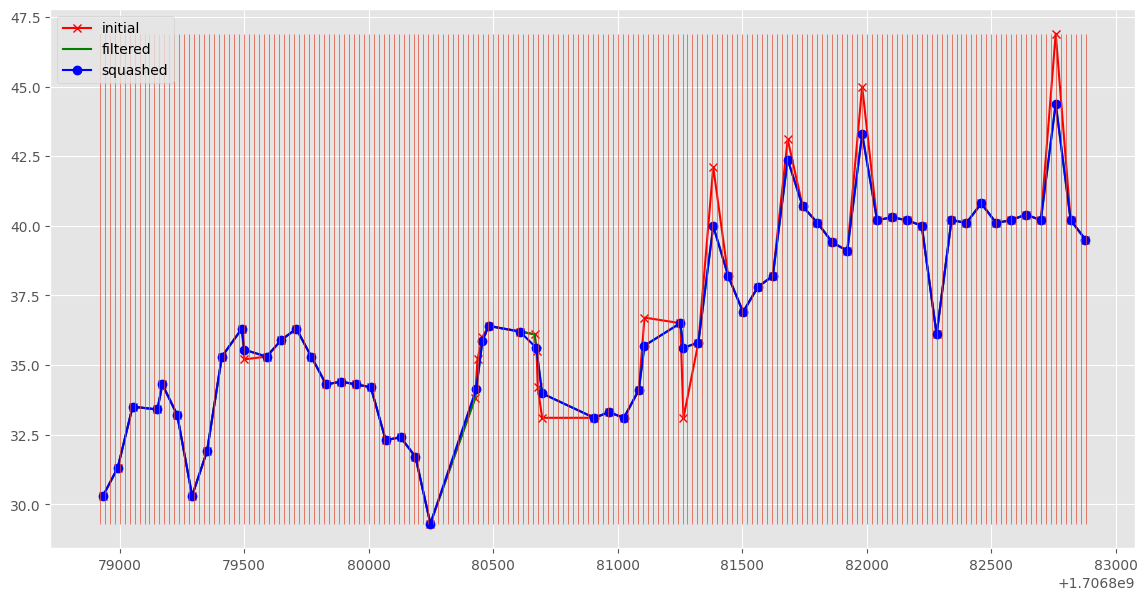

In [2]:
from mockdata import dt_mock_1, val_mock_1

ts_mock_1 = [x.timestamp() for x in dt_mock_1]
interval = 20
ts_grid_1 = create_ts_grid(dt_mock_1, interval)
roc = 0.07
filtered_val_mock_1 = limit_values_by_roc(dt_mock_1, val_mock_1, roc)
dt_grid_1 = [datetime.fromtimestamp(x, tz=timezone.utc) for x in ts_grid_1]
sq_dt_mock_1, sq_val_mock_1 = squash_bins(dt_mock_1, filtered_val_mock_1, dt_grid_1)

sq_ts_mock_1 = [x.timestamp() for x in sq_dt_mock_1]

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(ts_mock_1, val_mock_1, 'x-r', label='initial')
ax.plot(ts_mock_1, filtered_val_mock_1, '-g', label='filtered')
ax.plot(sq_ts_mock_1, sq_val_mock_1, 'o-b', label='squashed')

y_min = min(val_mock_1)
y_max = max(val_mock_1)
ax.vlines(ts_grid_1, y_min , y_max,  linewidth=0.5)

plt.legend()

Now, let's see what the splines built with different algorithms look like. In the case of AKIMA/MAKIMA, it is necessary to set <code>extrapolate = True</code> to extrapolate to out-of-bounds points.

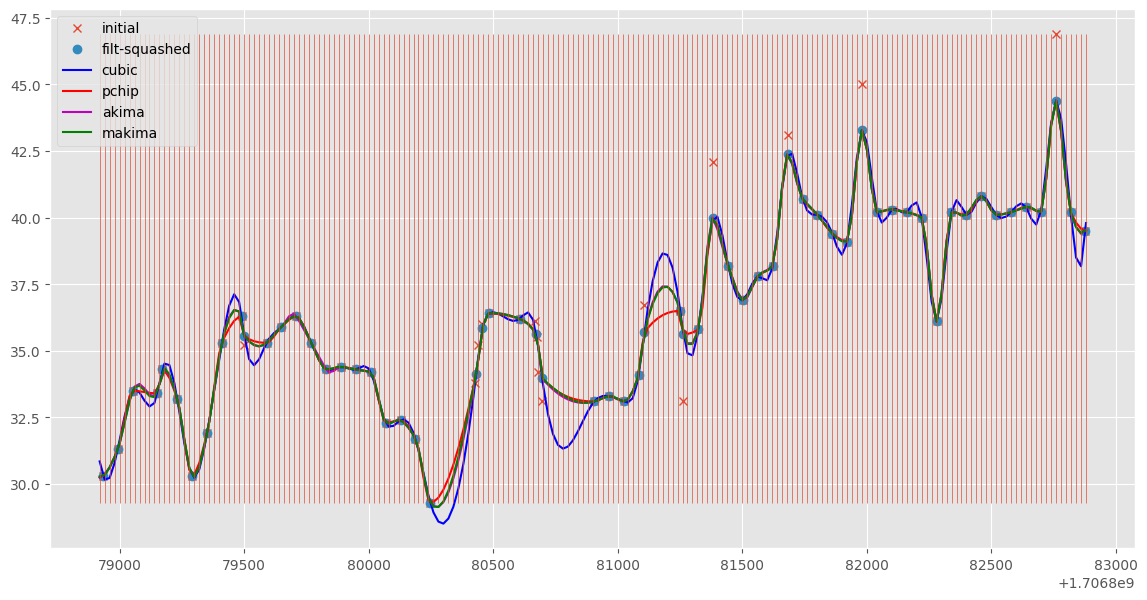

In [3]:


fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(ts_mock_1, val_mock_1, 'x', label='initial')
ax.plot(sq_ts_mock_1, sq_val_mock_1, 'o', label='filt-squashed')

spl_cubic = CubicSpline(sq_ts_mock_1, sq_val_mock_1)(ts_grid_1)
ax.plot(ts_grid_1, spl_cubic, '-b', label='cubic')

spl = PchipInterpolator(sq_ts_mock_1, sq_val_mock_1)(ts_grid_1)
ax.plot(ts_grid_1, spl, '-r', label='pchip')

spl_akima = Akima1DInterpolator(sq_ts_mock_1, sq_val_mock_1, extrapolate = True)(ts_grid_1)
ax.plot(ts_grid_1, spl_akima, '-m', label='akima')

spl_makima = Akima1DInterpolator(sq_ts_mock_1, sq_val_mock_1, method='makima', extrapolate = True)(ts_grid_1)
ax.plot(ts_grid_1, spl_makima, '-g', label='makima')

ax.vlines(ts_grid_1, y_min , y_max,  linewidth=0.5)

plt.legend()

Let's divide this graph into three parts and see these lines in detail.

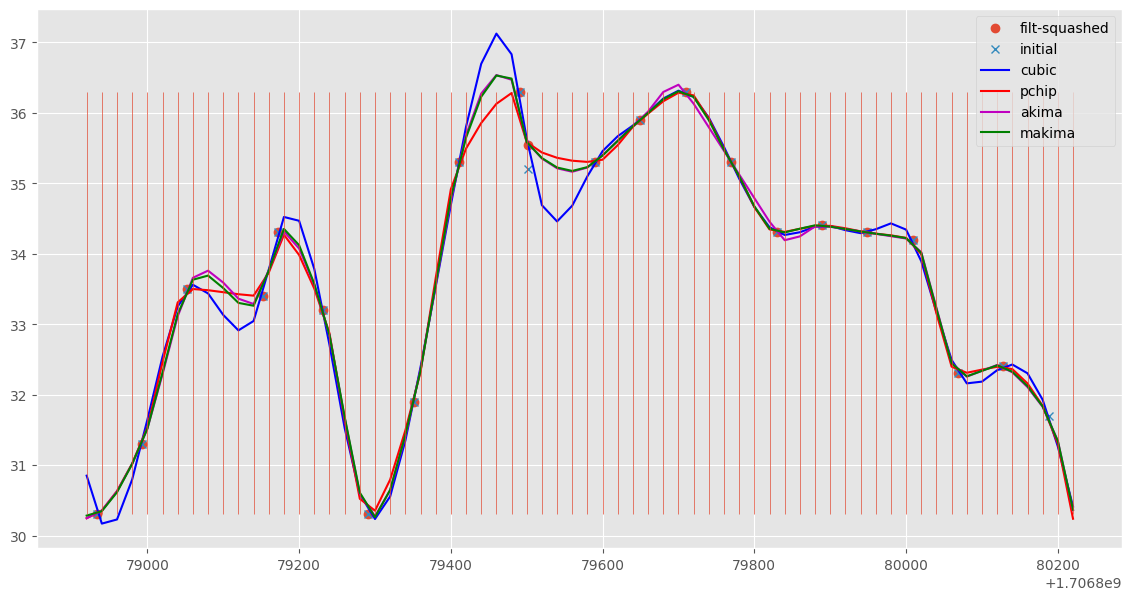

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

part_index_end = len(sq_ts_mock_1)//3
ax.plot(sq_ts_mock_1[:part_index_end], sq_val_mock_1[:part_index_end], 'o', label='filt-squashed')

part_index_end = len(ts_mock_1)//3
ax.plot(ts_mock_1[:part_index_end], val_mock_1[:part_index_end], 'x', label='initial')
y_min = min(val_mock_1[:part_index_end])
y_max = max(val_mock_1[:part_index_end])

part_index_end = len(ts_grid_1)//3
ax.plot(ts_grid_1[:part_index_end], spl_cubic[:part_index_end], '-b', label='cubic')
ax.plot(ts_grid_1[:part_index_end], spl[:part_index_end], '-r', label='pchip')
ax.plot(ts_grid_1[:part_index_end], spl_akima[:part_index_end], '-m', label='akima')
ax.plot(ts_grid_1[:part_index_end], spl_makima[:part_index_end], '-g', label='makima')

ax.vlines(ts_grid_1[:part_index_end], y_min , y_max, linewidth=0.5)

plt.legend()

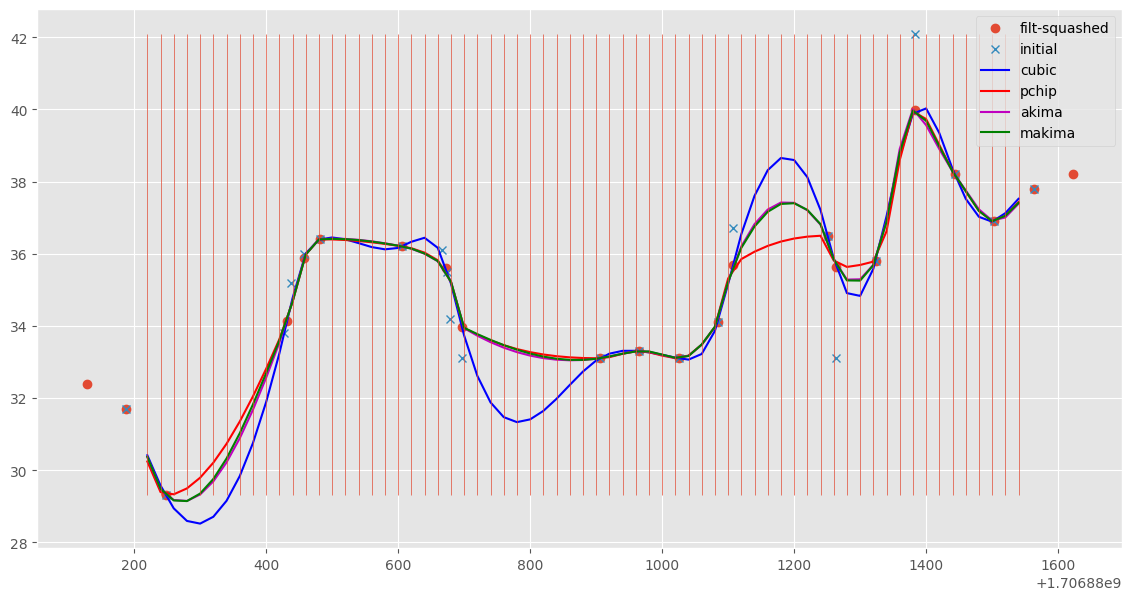

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))


part_index_start = len(sq_ts_mock_1)//3 - 1
part_index_end = (len(sq_ts_mock_1) *2)//3
ax.plot(sq_ts_mock_1[part_index_start:part_index_end], sq_val_mock_1[part_index_start:part_index_end], 'o', label='filt-squashed')

part_index_start = len(ts_mock_1) // 3 - 1
part_index_end = (len(ts_mock_1) * 2) // 3
ax.plot(ts_mock_1[part_index_start:part_index_end], val_mock_1[part_index_start:part_index_end], 'x', label='initial')
y_min = min(val_mock_1[part_index_start:part_index_end])
y_max = max(val_mock_1[part_index_start:part_index_end])

part_index_start = len(ts_grid_1) // 3 - 1
part_index_end = (len(ts_grid_1) * 2) // 3
ax.plot(ts_grid_1[part_index_start:part_index_end], spl_cubic[part_index_start:part_index_end], '-b', label='cubic')
ax.plot(ts_grid_1[part_index_start:part_index_end], spl[part_index_start:part_index_end], '-r', label='pchip')
ax.plot(ts_grid_1[part_index_start:part_index_end], spl_akima[part_index_start:part_index_end], '-m', label='akima')
ax.plot(ts_grid_1[part_index_start:part_index_end], spl_makima[part_index_start:part_index_end], '-g', label='makima')

ax.vlines(ts_grid_1[part_index_start:part_index_end], y_min , y_max, linewidth=0.5)

plt.legend()

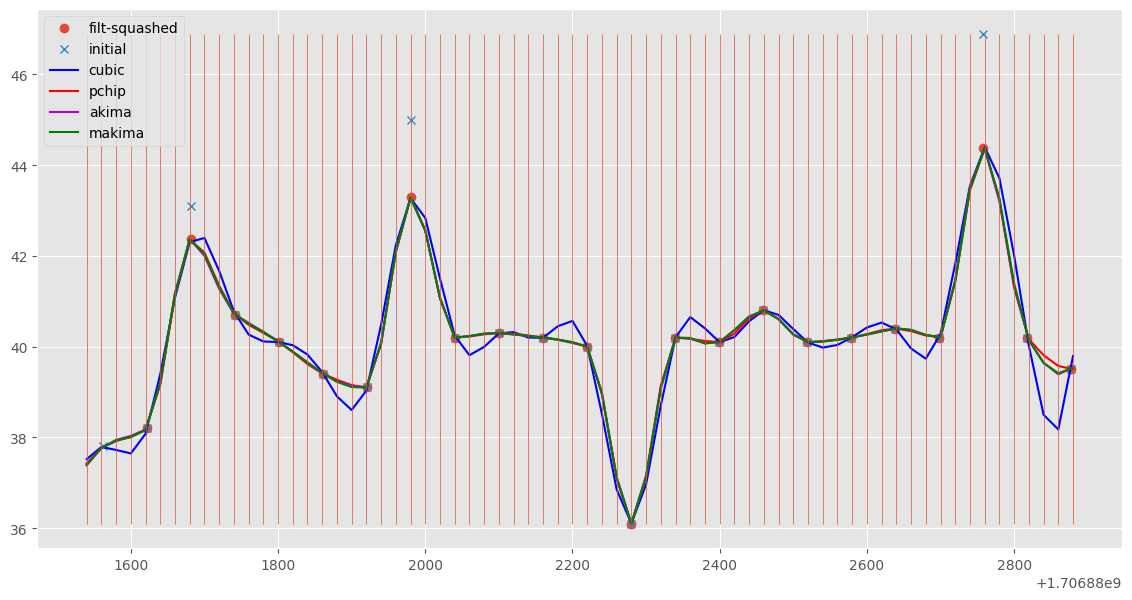

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

part_index_start = (len(sq_ts_mock_1) *2)//3 - 1
part_index_end = len(sq_ts_mock_1)
ax.plot(sq_ts_mock_1[part_index_start:part_index_end], sq_val_mock_1[part_index_start:part_index_end], 'o', label='filt-squashed')

part_index_start = (len(ts_mock_1) * 2) // 3 - 1
part_index_end = len(ts_mock_1)
ax.plot(ts_mock_1[part_index_start:part_index_end], val_mock_1[part_index_start:part_index_end], 'x', label='initial')
y_min = min(val_mock_1[part_index_start:part_index_end])
y_max = max(val_mock_1[part_index_start:part_index_end])

part_index_start = (len(ts_grid_1) * 2) // 3 - 1
part_index_end = len(ts_grid_1)
ax.plot(ts_grid_1[part_index_start:part_index_end], spl_cubic[part_index_start:part_index_end], '-b', label='cubic')
ax.plot(ts_grid_1[part_index_start:part_index_end], spl[part_index_start:part_index_end], '-r', label='pchip')
ax.plot(ts_grid_1[part_index_start:part_index_end], spl_akima[part_index_start:part_index_end], '-m', label='akima')
ax.plot(ts_grid_1[part_index_start:part_index_end], spl_makima[part_index_start:part_index_end], 'g', label='makima')

ax.vlines(ts_grid_1[part_index_start:part_index_end], y_min , y_max, linewidth=0.5)

plt.legend()

As can be seen, the "CubicSpline" interpolator creates an oscillating function with significant overshoots. The PCHIP interpolator conversely makes a spline as "flat" as possible. That is exactly what we wanted when said that the approximating spline should monotonously rise or fall between two adjacent points if the distance between their timestamps is less than T_change. Both "AKIMA"/"MAKIMA" are mostly intended to be used for purposes of plotting. On the other hand, these interpolators (especially "MAKIMA") give smoother splines than "PCHIP".

We will make a competition between "PCHIP" and "MAKIMA" (as it seems to give more "moderate" results than AKIMA). There are a couple of problems, and we need to check how our interpolator will cope with them.
<ol>
<li>As we agreed earlier, if the distance between two points is bigger than T_change, the continuous graph is broken into parts that we will call "chunks". Sometimes it is possible to have only two points in such a "chunk" of the line (for sure, it is possible to have even a "one-point" chunk, but in this case, we need no interpolator whatsoever). As we understand, only a straight line can be drawn through two points. This is not a big problem actually, because even if an interpolator fails to draw a straight line, we can build this straight line by using some algebra from the school. Anyway, having this option would be a small advantage for an interpolator.</li>
<li>The procedure of getting a new portion of raw data, processing it and attaching it to the existing array of resampled data will be executed from time to time for performance reasons. Say, the data may be coming every minute, but the function that takes these new five readings, resamples them and attaches them to the datafeed can be invoked once in, say, five minutes (preceding the evaluation of the "main" application function). Our algorithms shouldn't "change the data from the past", which means that if some value for a timestamp X was already stored in a datafeed, it shouldn't be changed when some new data has come after this moment X. In other words, the algorithm shouldn't be tempted to correct data from the past.</li>
</ol>

We will use the datafeed used to build the above splines. Imagine that the resampling function is called every minute, checks if new data has come, and if yes, then tries to continue the previously built spline. It is clear, that at least three points are necessary to build a curve. One point is just a point, and two points can be used only for building a straight line. So, what our resampling function should do? Whenever it is invoked, it should go point by point and check whether the distance between the last point from the set of already processed points and the first item from the "fresh" set is less than <b>T_change</b>. If this is not so, then it is necessary to close the current "chunk" and start a new one with this "distant" point as the first member. While moving along the horizontal axis from the left to the right, our function can leave "chunks" consisting of 1, 2 and many points. Then it will be necessary to apply all the procedures we have introduced so far to these "chunks" independently.

<ul>
<li>One point. As we introduced the <b>T_const</b> term earlier, we can assume that any single point can be "stretched" to the value of <b>T_const</b>. As our resampling interval equals <b>T_const_min</b> we can be sure that each such a point, no matter which datastream it belongs to, will have at least one intersection with the grid (Fig.2.1). If the point is right in the middle of the interval (which is very unlikely but we cannot exclude this possibility to happen), then we can agree that it is moved to the left side of the interval.<br><br>
    <img src="./images/t2/2.1.jpg" style="width: 500px;"/>
</li>
<li>If a chunk has two points, then a straight line is drawn through these two points until it reaches out-of-bound lines (Fig.2.2)<br><br><img src="./images/t2/2.2.jpg" style="width: 500px;"/></li>
<li>If a chunk has at least three points, then it is possible to draw a curve that passes all the points. The question is how to continue this spline when new points come. We can try building our spline over three points, "1", "2" and "3". When the fourth point comes, we use points "2" and "3", add point "4" to them and build a new spline hoping that it will be the same on the interval "2":"3". In order not to overload this notebook with a lot of code, I will just show what the results of this approach look like (Fig.2.3). The code used the PCHIP interpolator, but the results with "AKIMA"/"MAKIMA" would be the same.<br><br><img src="./images/t2/2.3.jpg" style="width: 700px;"/><br><br> Looks like the second spline doesn't match the first spline at all in the interval "2":"3". So, if we go this way, we will need to decide which of those two options we would like to use and which one to discard. This will result in a spline of a very bizarre shape, and this is what we definitely don't want to have. <br><br>
Intuition says that the more points we have in a chunk the closer our "partial" spline gets to the original one. On the other hand, we need to propose some way of building a spline from pieces, so that this way requires minimum points to start with.</li></li>
</ul>

When we build a partial spline based on several points from the whole set, the first piece of this partial spline (the piece between the first and the second point of this partial set) doesn't match very well with the original spline. The same is true for the last piece of the partial spline. But the part in the middle should be more or less the same as the original spline. To have three parts of the partial spline we need at least four points to build it. This idea is represented in Fig.2.4. Just imagine that we have several raw measurements (blue crosses). First, we apply to these points the procedures of ROC-filtering and then squashing (as we did in the previous part of this document). Then we built the whole spline passing all the "filtered/squashed" points. Just to remind us how we build it: we find the closest from the left "round" timestamp to the first "filtered/squashed" point, the closest from the right "round" timestamp for the last "filtered/squashed" point, build a grid between them and apply the interpolator procedure. Thus, the spline "embraces" all "filtered/squashed" points.

What do we do after that? We build a series of "partial" splines based on the same interval as the initial spline using the same approach. We take 4 first "filtered/squashed" points (<b style="color: red">1-2-3-4</b> in our case), build a spline, then take points <b style="color: red">2-3-4-5</b>, build another spline and so on. As can be seen, these partial splines may not be of the same shape as the initial spline (black dots) in their first and last sections, but in the middle, they match the initial spline quite well. We will call this parameter that represents the minimum number of "filtered/squashed" points needed to build a partial spline a <code>width</code>. It is clear that <code>width >= 4</code>

<img src="./images/t2/2.4.jpg" style="width: 700px;"/><br>Fig.2.4<br><br>

How can we use it? Let our data come from a diagnostic kit with two temperature sensors every minute (in real life it doesn't come exactly at every minute, which will be simulated by our test data), and every minute at "round" times like 14:20:00, 14:21:00 etc 
<ol>
<li>the resampling procedure is performed</li>
<li>the application function is executed</li>
</ol>   

Our resampling procedure checks whether the timestamp distances between adjacent points or between the last point and the current time are <= <b>T_change</b>. If not, it closes the previous chunk and starts a new one. But in this chapter for simplicity let's assume that we are dealing with one big chunk. The value of <code>interval</code> in our example will be 20 seconds. In Fig.2.4 the moments of invocation of the resampling function are shown as fat purple vertical lines, while the resampling "knots" are shown as red thin vertical lines. We started at moment "0". One minute passed and blue points <b style="color: blue">1</b> and <b style="color: blue">2</b> have been catched between two purple lines <b style="color: purple">0</b> and <b style="color: purple">1st</b>. We apply filtering and squashing procedures to these "raw" readings and get two red points <b style="color: red">1</b> and <b style="color: red">2</b>. Two points are not enough to build a partial spline (we agreed that we would like to have at least four points). We wait one more minute and check again, now between lines <b style="color: purple">0</b> and <b style="color: purple">2nd</b>. Nothing has come in last minute, so we wait again. The third minute gives us point <b style="color: red">3</b>, but still, we don't have four points. Only after the fourth minute do we have four points and can draw the blue partial spline. We can take the middle part of this spline <b style="color: red">2-3</b> (in this case we can also take the first part of it <b style="color: red">1-2</b>, but this is relevant only for the first partial spline in a chunk). Now we can say that our leftmost "filtered/squashed" point <b style="color: red">1</b> can be excluded from the consideration, but instead, we want some fresh new point. We wait for one more minute and point <b style="color: blue">5</b> comes, which gives us "filtered/squashed" point <b style="color: red">5</b>. We can repeat our procedure for the sequence <b style="color: red">2-3-4-5</b>, which gives us the orange partial spline, whose middle part <b style="color: red">3-4</b> is used for building the next part of the whole spline (note how the middle part of the orange spline matches the initial spline). Then it will be the set of "raw" readings <b style="color: blue">3-4-5-6</b> transformed to <b style="color: red">3-4-5-6</b> and the green spline will be built based on these points. Its middle part <b style="color: red">4-5</b> will be used for building the next part of the whole spline. And so on.

Let's introduce a couple of functions to make our life easier. First, let's put all the procedures related to preparing datastreams (filtering, squashing) into one function. This function will be called <code>create_squashed_ds</code>.

In [7]:
def create_squashed_ds(dt_arr, val_arr, interval, roc, base_point=None):
    ts_grid = create_ts_grid(dt_arr, interval)
    if not ts_grid:
        return None, None, None
    filtered_val_arr = limit_values_by_roc(dt_arr, val_arr, roc, base_point)
    if not filtered_val_arr:
        return None, None, None
    dt_grid = [datetime.fromtimestamp(x, tz=timezone.utc) for x in ts_grid]
    sq_dt_arr, sq_val_arr = squash_bins(dt_arr, filtered_val_arr, dt_grid)
    if not sq_dt_arr:
        return None, None, None
    sq_ts_arr = [x.timestamp() for x in sq_dt_arr]
    return sq_ts_arr, sq_val_arr, ts_grid

The second function will just draw a spline. Here we use our previously prepared <code>create_squashed_ds</code> function. The parameter <code>draw_init</code> lets us choose whether we want to draw the initial, raw points (they will be drawn as blue crosses) in addition to "filtered/squashed" values (red circles). The option <code>draw_grid</code> probably doesn't need any explanation.

In [8]:
def draw_spline(dt_arr,
                val_arr, 
                ax, 
                interval, 
                roc, 
                interp, 
                interp_opts={}, 
                draw_init=False, 
                draw_grid=False,
                style='--r'):
    if len(dt_arr) != len(val_arr) or len(dt_arr) < 2 or roc <= 0:
        log('draw_spline: limit_values_by_roc: Input data is invalid', LogLevel.ERROR)
        return
    sq_ts_arr, sq_val_arr, ts_grid = create_squashed_ds(dt_arr, val_arr, interval, roc)
    ts_arr = [x.timestamp() for x in dt_arr]

    spl = interp(sq_ts_arr, sq_val_arr, **interp_opts)(ts_grid)
    ax.plot(ts_grid, spl, style, label=interp.__name__)

    if draw_grid:
        y_max = max(val_arr)
        y_min = min(val_arr)
        ax.vlines(ts_grid, y_min , y_max, 'r', linewidth=0.5)

    if draw_init:
        ax.plot(sq_ts_arr, sq_val_arr, 'or', label='filt-squashed')
        ax.plot(ts_arr, val_arr, 'xb', label='initial')

    plt.legend()

Now let's take a chunk from our fake data and draw a couple of splines - PCHIP and MAKIMA. As can be seen, we use only one <code>ax</code>, where we store our figures layer by layer. Also, we set here values for <code>interval</code> (20) and <code>roc</code> (0.07), and these values will be used later when we play with the partial spline building function. 

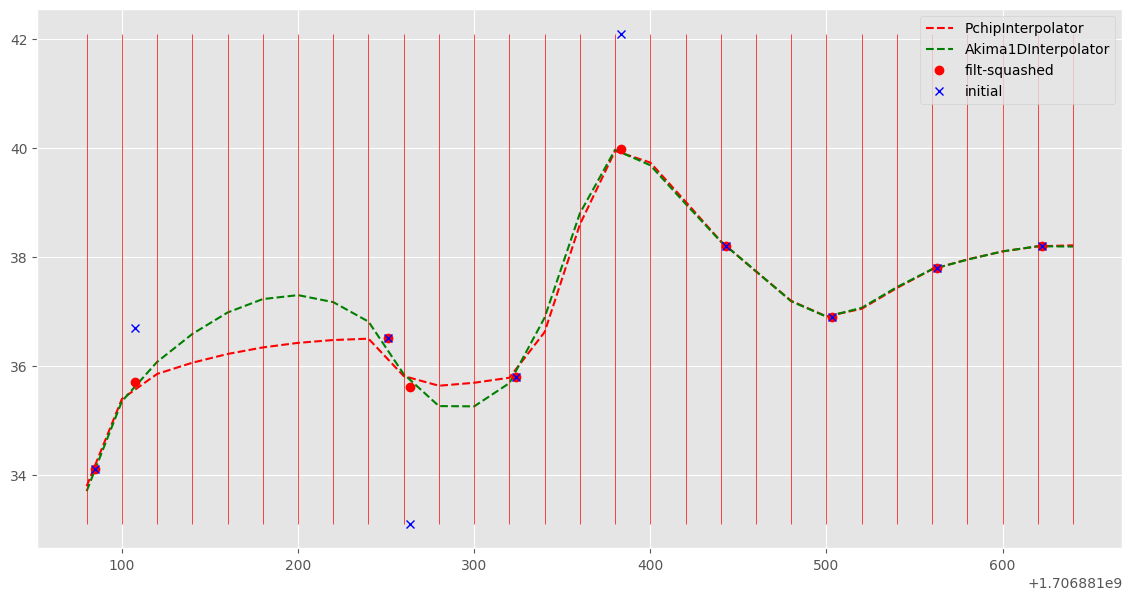

In [9]:
dt_arr = dt_mock_1[35: 45]
val_arr = val_mock_1[35: 45]

interval = 20
roc = 0.07

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

draw_spline(dt_arr, 
            val_arr, 
            ax, 
            interval, 
            roc, 
            PchipInterpolator)
draw_spline(dt_arr, 
            val_arr, 
            ax, 
            interval, 
            roc, 
            Akima1DInterpolator, 
            interp_opts={'method':'makima', 'extrapolate': True}, 
            draw_init=True, 
            draw_grid=True, 
            style='--g')

To build a partial spline we will need another couple of auxiliary functions and objects. The function <code>filter_ds_points</code> will filter the points lying in the interval [<code>dt_start</code>, <code>dt_end</code>). Just note that if the first and the last timestamps from <code>dt_arr</code> are equal to <code>dt_start</code> and <code>dt_end</code> respectively, the first will be included in the filtered array and the last will not.

In [10]:
def filter_ds_points(dt_arr, val_arr, dt_start, dt_end):
    part_dt_arr = []
    part_val_arr = []
    for i, dt in enumerate(dt_arr):
        if (dt >= dt_start and dt < dt_end): # >=, but < to fulfill the condition "[;)"
            part_dt_arr.append(dt_arr[i])
            part_val_arr.append(val_arr[i])
    return part_dt_arr, part_val_arr


We are going to build many small splines, so it will be necessary to give them different colors to be able to distinguish them on the graph. We create a <code>cycle</code> object with several contrast colors.

In [11]:
from itertools import cycle

line_colours = cycle(['tab:blue', 
                      'tab:orange',
                      'tab:green',
                      'tab:red',
                      'tab:cyan',
                      'tab:purple',
                      'tab:olive',
                      ])

Now about the partial spline function itself. As this function should imitate cyclic invocations of the resampling procedure, first we build a so-called "invocation grid". If we decide to imitate invocation every minute, then we will need timestamps like "21:03:00", "21:04:00" and so on. For this purpose we introduce <code>invoc_interval</code> in addition to <code>interval</code>. Theoretically, these two parameters are independent, but it is recommended that the value of <code>interval</code> is a divisor of <code>invoc_interval</code>. In the example below we will use 60 seconds and 20 seconds for <code>invoc_interval</code> and <code>interval</code> respectively.
It is necessary to admit that our <code>build_piecewise_spline</code> function in its core imitates the continuous invocation of another, "real" function. In this example, this "real" function is just a set of lines of code inside the <code>build_piecewise_spline</code> function, but imagine that in the real application, this "external" cycle will be provided by some cyclic engine like "celery-beat".
To keep it more or less simple, our "real" function takes "raw" readings at every invocation. It means that even though it creates "filtered/squashed" samples at every invocation, it doesn't keep it and it starts from scratch at the next invocation. In the "production" implementation this approach will help to build a "stateless" function and it will be possible to feed it any set of raw data. On the other hand, recalculating every time "filtered/squashed" values can add some unnecessary overhead. But at least here we use the "stateless" approach where the function can derive all necessary intermediate parameters from a minimal set of the input parameters. 


A couple of considerations.
<ol>
<li>It may happen that more than one point can be "catched" in one execution interval, like points <b style="color: blue">1</b> and <b style="color: blue">2</b> have been catched between two purple lines <b style="color: purple">0</b> and <b style="color: purple">1st</b> in our above example. In this case, the total amount of points used for building a partial spline will be more than four, and the spline will have not 3 parts but more. We will use all the middle parts of this spline, but then it will be necessary to throw away not only the leftmost point but more. To say simpler, we don't need to remove the leftmost point when we move further along the horizontal axis, but we need to keep <code>width-1</code> "filtered/squashed" points from the right, and then add at least one more point to this pack to have again at least <code>width</code> points and build the next partial spline. For example, if the first partial spline was built using points <b style="color: red">1-2-3-4-5-6</b>, the pieces <b style="color: red">2-3</b>, <b style="color: red">3-4</b> and <b style="color: red">4-5</b> from the partial spline will be used, therefore we need to leave points <b style="color: red">4</b>, <b style="color: red">5</b> and <b style="color: red">6</b> for the next invocation. Maybe a new point <b style="color: red">7</b> will come by that time, so it will be possible to build a partial spline <b style="color: red">4-5-6-7</b> from which part <b style="color: red">5-6</b> will be used as a building brick for the whole spline. That's what is implemented for the parameter <code>start_dt</code> in line 47 in the code below.</li>
<li>As we are moving to the right, we should retain a base point for the ROC filtering when new points are coming. Again, using the example with this <b style="color: red">1-2-3-4-5-6-7</b> spline we can say that if we are going to use "raw" points <b style="color: blue">4-5-6</b> then we need a base point, which will be the "filtered/squashed" point <b style="color: red">3</b> (or <code>-width</code> if we use the Python negative index syntax). You can see it in line 48.</li>
</ol> 

The parameter <code>draw_part_spl_arc</code> if set to <code>True</code> helps to build an arc between the first and the last points of a partial spline. It makes the identification of the spline easier. The parameter <code>draw_invoc_grid</code> is responsible for drawing the invocation grid. 

The parameter <code>crop_ends</code> id set to <code>True</code> hides the first and the last parts of a partial spline leaving only parts needed for building the whole spline. Note that these building pieces of splines are built in such a manner that each of these pieces starts at the closest from the left point to a "filtered/squashed" point <b>k</b> and ends at the closest to the left point to a "filtered/squashed" point <b>k+1</b>.<br><br><img src="./images/t2/2.5.jpg" style="width: 500px;"/>

In [12]:
def build_piecewise_spline(dt_arr, 
                           val_arr, 
                           ax, 
                           width, 
                           interval, 
                           invoc_interval, 
                           roc, 
                           interp, 
                           interp_opts={}, 
                           draw_part_spl_arc=False,
                           draw_invoc_grid=False,
                           crop_ends=False):
    if len(dt_arr) != len(val_arr) or len(dt_arr) < 2 or roc <= 0 or width < 4:
        log('build_piecewise_spline: Input data is invalid', LogLevel.ERROR)
        return
    spl_part = None
    dt_part_arr = None
    val_part_arr = None
    sq_ts_part_arr = None
    sq_val_part_arr = None
    ts_grid_part_arr = None

    invoc_ts_grid = create_ts_grid(dt_arr, invoc_interval)
         
    base_point = None
    start_dt = datetime.fromtimestamp(invoc_ts_grid[0], tz=timezone.utc)
    end_dt = None
    
    if draw_invoc_grid:
        y_max = max(val_arr)
        y_min = min(val_arr)
        ax.vlines(invoc_ts_grid, y_min , y_max, 'm', linewidth=1.5)

    invoc_ts_grid = invoc_ts_grid[1:]

    for idx, ts in enumerate(invoc_ts_grid):
        # this is where our "real" function begins
        is_enough_points_for_part_spline = False
        end_dt = datetime.fromtimestamp(ts, tz=timezone.utc)
        dt_part_arr, val_part_arr = filter_ds_points(dt_arr, 
                                                val_arr, 
                                                start_dt, 
                                                end_dt)
        sq_ts_part_arr, sq_val_part_arr, ts_grid_part_arr = create_squashed_ds(dt_part_arr, val_part_arr, interval, roc, base_point)
        if sq_ts_part_arr and len(sq_ts_part_arr) >= width: # there may be more than 'width" points, that's why '>='
            is_enough_points_for_part_spline = True
            start_dt = floorDatetime(datetime.fromtimestamp(sq_ts_part_arr[-width+1], tz=timezone.utc), interval) # next part will start from the samples with ts > sq_ts_part_arr[-width+1]
            base_point = [datetime.fromtimestamp(sq_ts_part_arr[-width], tz=timezone.utc), sq_val_part_arr[-width]] # next base point will be previous to start_dt point

        if is_enough_points_for_part_spline:
            spl_part = interp(sq_ts_part_arr, sq_val_part_arr, **interp_opts)(ts_grid_part_arr)
            color = next(line_colours)
            if crop_ends:
                ts_middle_start = floorDatetime(datetime.fromtimestamp(sq_ts_part_arr[1], tz=timezone.utc), interval).timestamp()
                ts_middle_end = ceilDatetime(datetime.fromtimestamp(sq_ts_part_arr[-2], tz=timezone.utc), interval).timestamp()
                ts_grid_onepiece_arr, val_onepiece_arr = filter_ds_points(ts_grid_part_arr, spl_part, ts_middle_start, ts_middle_end)
                ax.plot(ts_grid_onepiece_arr, val_onepiece_arr, color, label= f'{idx+1}')
            else:
                ax.plot(ts_grid_part_arr, spl_part, color, label= f'{idx+1}')
            if draw_part_spl_arc:
                ax.plot([ts_grid_part_arr[0], ts_grid_part_arr[-1]], [spl_part[0], spl_part[-1]], linestyle='--', color=color)
    plt.legend()

Now that we've prepared the function let's use it with some data. First, let's see how it will recreate the full splines from above. To build the invocation grid we use the coefficient <code>invoc_int_coef</code> (as we said earlier, it is recommended that the value of <code>interval</code> is a divisor of <code>invoc_interval</code>, so here is our divisor).

In [13]:
width = 4
invoc_int_coef = 3

First, let's build it for the PCHIP spline. Looks not bad.

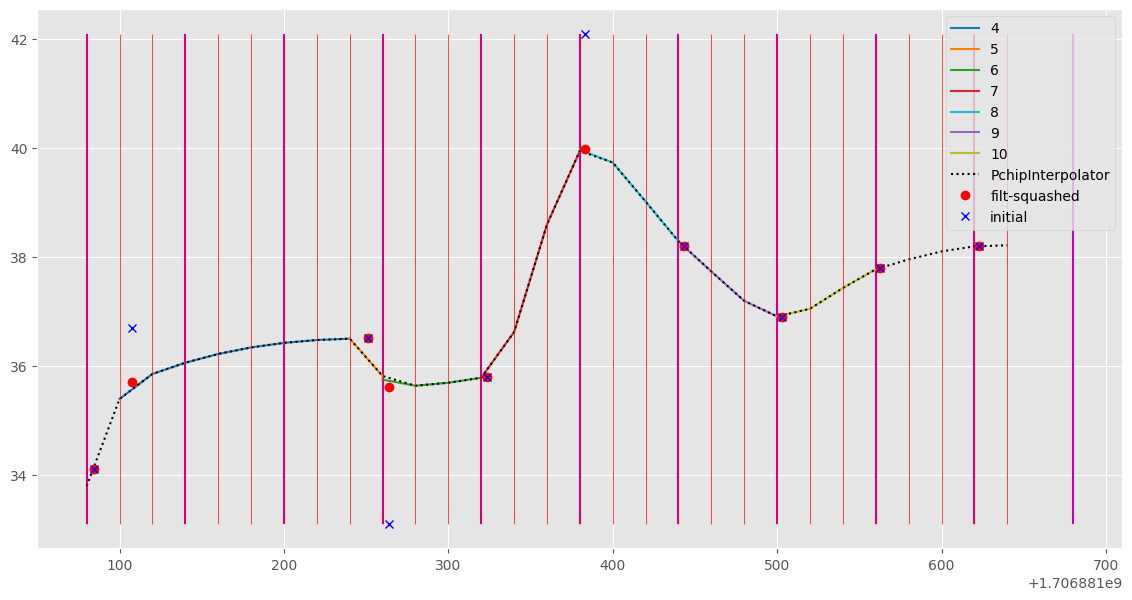

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

build_piecewise_spline(dt_arr, 
                       val_arr, 
                       ax, 
                       width=width, 
                       interval=interval, 
                       invoc_interval=interval*invoc_int_coef, 
                       roc=roc,
                       interp=PchipInterpolator,
                       draw_part_spl_arc= False,
                       draw_invoc_grid=True,
                       crop_ends=True)

draw_spline(dt_arr, 
            val_arr, 
            ax, 
            interval, 
            roc, 
            PchipInterpolator, 
            interp_opts={}, 
            draw_init=True, 
            draw_grid=True,
            style=':k')

Now for the MAKIMA one. Not as good as PCHIP.

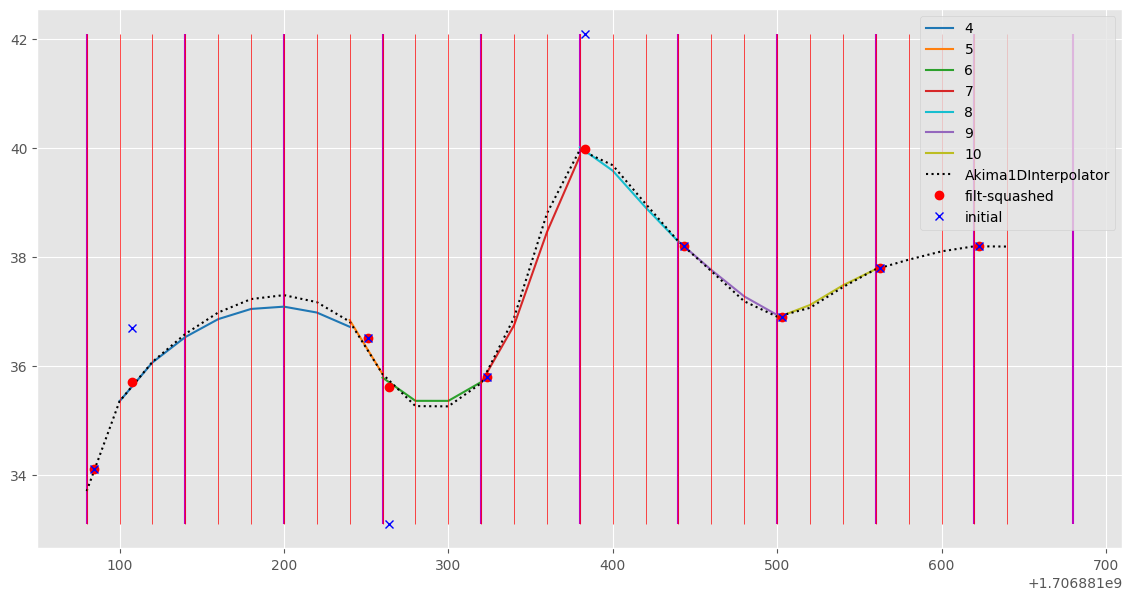

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

build_piecewise_spline(dt_arr, 
                       val_arr, 
                       ax, 
                       width=width, 
                       interval=interval, 
                       invoc_interval=interval*invoc_int_coef, 
                       roc=roc,
                       interp=Akima1DInterpolator,
                       interp_opts={'method': 'makima', 'extrapolate': True},
                       draw_part_spl_arc= False,
                       draw_invoc_grid=True,
                       crop_ends=True
                       )

draw_spline(dt_arr, 
            val_arr, 
            ax, 
            interval, 
            roc, 
            Akima1DInterpolator, 
            interp_opts={'method':'makima', 'extrapolate': True}, 
            draw_init=True, 
            draw_grid=True,
            style=':k')

Let's take another piece of our big datastream.

In [16]:
dt_arr = dt_mock_1[47:62]
val_arr = val_mock_1[47:62]

[ERROR]: limit_values_by_roc: Input data is invalid


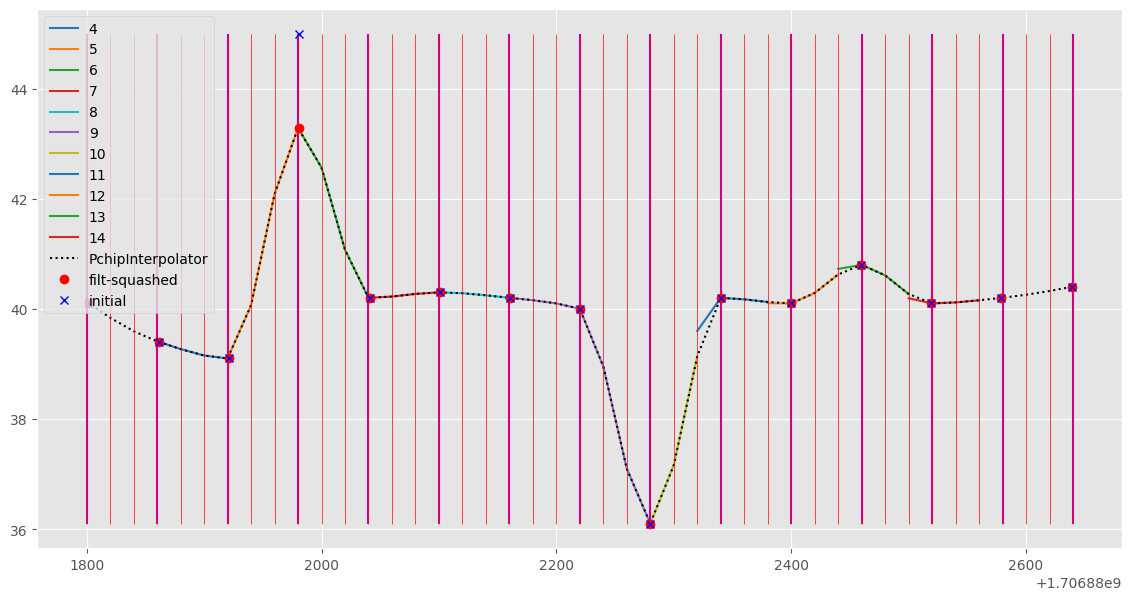

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

build_piecewise_spline(dt_arr, 
                       val_arr, 
                       ax, 
                       width=width, 
                       interval=interval, 
                       invoc_interval=interval*invoc_int_coef, 
                       roc=roc,
                       interp=PchipInterpolator,
                       draw_part_spl_arc= False,
                       draw_invoc_grid=True,
                       crop_ends=True)

draw_spline(dt_arr, 
            val_arr, 
            ax, 
            interval, 
            roc, 
            PchipInterpolator, 
            interp_opts={}, 
            draw_init=True, 
            draw_grid=True,
            style=':k')

[ERROR]: limit_values_by_roc: Input data is invalid


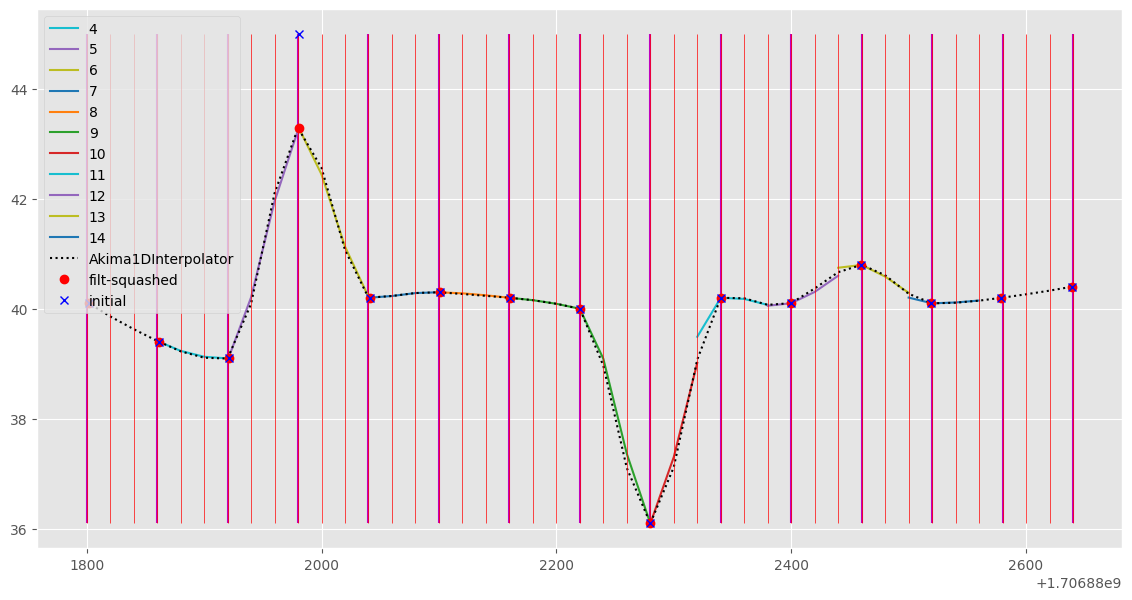

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

build_piecewise_spline(dt_arr, 
                       val_arr, 
                       ax, 
                       width=width, 
                       interval=interval, 
                       invoc_interval=interval*invoc_int_coef, 
                       roc=roc,
                       interp=Akima1DInterpolator,
                       interp_opts={'method': 'makima', 'extrapolate': True},
                       draw_part_spl_arc=False,
                       draw_invoc_grid=True,
                       crop_ends=True
                       )

draw_spline(dt_arr, 
            val_arr, 
            ax, 
            interval, 
            roc, 
            Akima1DInterpolator, 
            interp_opts={'method':'makima', 'extrapolate': True}, 
            draw_init=True, 
            draw_grid=True,
            style=':k')

Some considerations.

<ul>
<li>The PCHIP interpolator works better, particularly when there are big distances between adjacent points.
</li>
<li>As can be seen, we have two values at the connection points (where two pieces connect to each other) - from the previous piece and from the next one. Also, it is seen that the first points from the next pieces usually don't match the original spline quite often (Fig.2.6).<br><br> 
<img src="./images/t2/2.6.jpg" style="width: 500px;"/><br><br> 
As only one point out of two should be left, we will prefer to keep the last point from the previous piece.
</li>
</ul>

So, how our resampling mechanism should work? For example, our resampling function is invoked every two minutes. 

On its first invocation, which takes place on 01.04.2024 at 15:02:00, it checks all the raw data collected before this date. In a formal way, it checks the data from the ts = 0, which is 01-01-1970 00:00:00, to 01-04-2024 15:02:00. If there is some data, the algorithm tries to divide it into chunks, so an output there can be 0, 1 or several chunks. If we have at least one chunk, it is quite possible that it is not closed, which means that the distance from the last point in the chunk to our timestamp 01-04-2024 15:02:00 is less than <b>T_change</b>. For each CLOSED chunk, we perform:
<ul>
<li>If there is only one point in the chunk, we "connect" it to the closest grid line. If this point is exactly in the middle, then we move it to the left grid line.</li>
<li>If there are two points in the chunk, we apply ROC filtering/squashing and then draw the straight line through these two points, this line touches out-of-bound grid lines.</li>
<li>If there are three or more points in the chunk, we apply ROC filtering/squashing and then draw the spline through these two points, this spline touches out-of-bound grid lines.</li>
</ul>

If the last chunk is still open, our algorithm is waiting for new raw points to come to do all the things we discussed in this chapter. If the chunk finally is closed while it has 1, 2 or 3 points, we follow the points from the list above. If it is closed when it has 4 or more points, and some partial splines have already been built, then the tail from the last spline is used to close the whole spline for this chunk, and everything starts again - waiting for the next point to start a new chunk etc.